# Images paths

In [18]:
image2_path = r"..\OneDrive-2022-12-27/copy F3925V_24um_A.jpg"

image7_path = r"..\OneDrive-2022-12-27\F3925V_24um_B_2.jpg"

image19_path = r'..\[02.08] 9_LL_20D_5072 @21um\9_LL_20D_5072_Meio_copy.jpg'

image20_path = r'..\[02.08] 9_LL_20D_5072 @21um\9_LL_20D_5072_topo_copy.jpg'

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from skimage import io, color, filters, draw
plt.rcParams['animation.ffmpeg_path'] = 'C:/bin/ffmpeg'

# Ensure the animation is displayed in the notebook
from IPython.display import HTML

def rev_analysis(image_path, title, threshold=0.15, sigma=2, binary_values=(0, 1), shape='circle'):
    binary_img = binarize_image(image_path, threshold, sigma, binary_values)
    if binary_img is None:
        return None, None, None
    
    height, width = binary_img.shape
    center_y, center_x = height // 2, width // 2
    
    if shape == 'circle':
        max_radius = min(center_y, center_x)
    elif shape == 'rectangle':
        max_radius = max(center_y, center_x)
    else:
        raise ValueError("Shape must be 'circle' or 'rectangle'.")
    
    radii = np.linspace(1, max_radius, num=50, dtype=int)
    rev_ratios = []

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(title)

    ax1.imshow(binary_img, cmap='gray')
    ax1.set_title('Binary Image with ROI')
    ax1.axis('off')

    line, = ax2.plot([], [], marker='o')
    ax2.set_xlim(0, max_radius)
    ax2.set_ylim(0, .2)
    ax2.set_title('REV Ratio')
    ax2.set_xlabel('Radius (pixels)')
    ax2.set_ylabel('Porosity (v/v)')
    ax2.grid(True)

    def update(frame):
        radius = radii[frame]
        mask = np.zeros_like(binary_img, dtype=bool)
        if shape == 'circle':
            rr, cc = draw.disk((center_y, center_x), radius, shape=binary_img.shape)
        elif shape == 'rectangle':
            extent_height = int(2 * radius)
            extent_width = int(2 * radius * (width / height))
            top_left_y = max(center_y - extent_height // 2, 0)
            top_left_x = max(center_x - extent_width // 2, 0)
            bottom_right_y = min(center_y + extent_height // 2, height)
            bottom_right_x = min(center_x + extent_width // 2, width)
            rr, cc = draw.rectangle((top_left_y, top_left_x), extent=(bottom_right_y - top_left_y, bottom_right_x - top_left_x), shape=binary_img.shape)
        
        mask[rr, cc] = True
        pore_area = np.sum(binary_img[mask] == 0)  # Detect pores as black pixels (0)
        total_area = np.sum(mask)
        rev_ratio = pore_area / total_area
        rev_ratios.append(rev_ratio)
        
        ax1.clear()
        ax1.imshow(binary_img, cmap='gray')
        ax1.set_title('Binary Image')
        ax1.axis('off')
        if shape == 'circle':
            circle = plt.Circle((center_x, center_y), radius, color='red', fill=False)
            ax1.add_patch(circle)
        elif shape == 'rectangle':
            rect = plt.Rectangle((top_left_x, top_left_y),
                                 bottom_right_x - top_left_x, bottom_right_y - top_left_y, edgecolor='red', fill=False)
            ax1.add_patch(rect)

        line.set_data(radii[:frame+1], rev_ratios[:frame+1])
        
        return line, ax1

    ani = FuncAnimation(fig, update, frames=len(radii), blit=False, interval=200)
    plt.close(fig)
    return ani

# Testing function
image_path = 'pore_test.png'
ani = rev_analysis(image_path, title='test',threshold=0.5, sigma=1, binary_values=(0, 1), shape='rectangle')

# Show animation
HTML(ani.to_jshtml())



## Implementing segmentation function

C:\Users\patri\AppData\Local\Temp\ipykernel_292\2923094056.py:504: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  binary_img = morphology.remove_small_objects(binary_img, min_size=min_size)
C:\Users\patri\miniconda3\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\patri\miniconda3\envs\tensorflow\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Altura: 6241 pixels, Largura: 6257 pixels
Área total em pixels: 39049937 pixels²
Soma das áreas segmentadas: 4510200.25 pixels²
Razão: 0.12


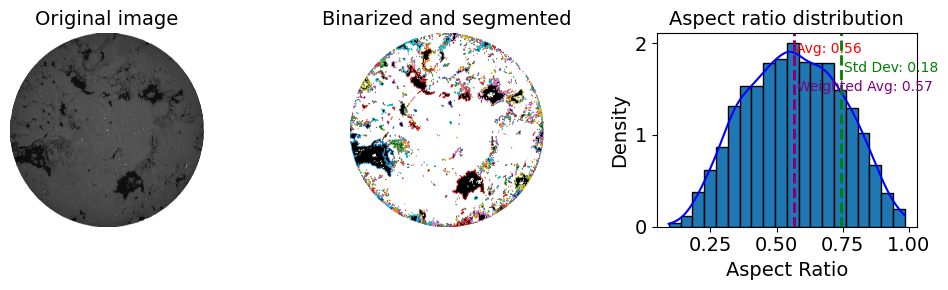

Altura: 6334 pixels, Largura: 2958 pixels
Área total em pixels: 18735972 pixels²
Soma das áreas segmentadas: 2109551.25 pixels²
Razão: 0.11


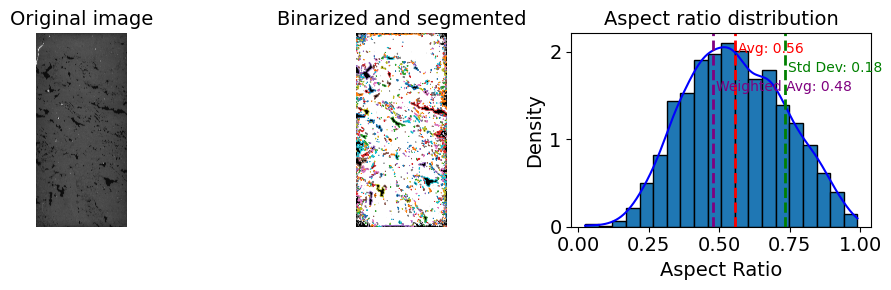

Altura: 5769 pixels, Largura: 5735 pixels
Área total em pixels: 33085215 pixels²
Soma das áreas segmentadas: 1965764.75 pixels²
Razão: 0.06


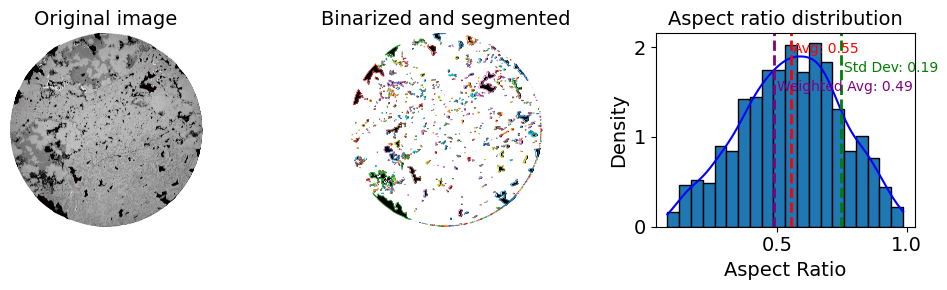

Altura: 5728 pixels, Largura: 5728 pixels
Área total em pixels: 32809984 pixels²
Soma das áreas segmentadas: 4090701.00 pixels²
Razão: 0.12


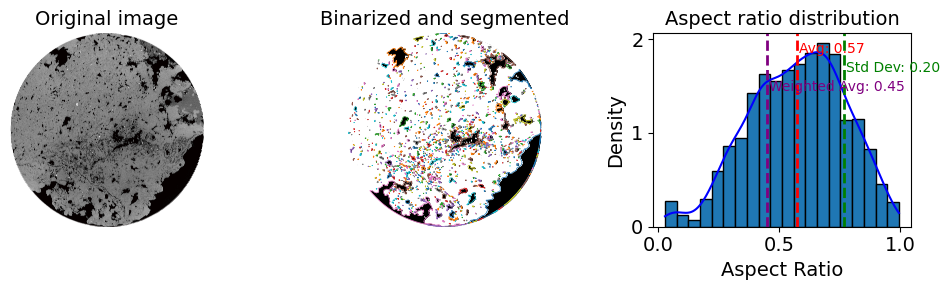

In [28]:

aspect_ratios2, average2, areas2, total_area2, width2, height2, major_lengths2, minor_lengths2 = aspect_ratio(image2_path,'B4_radial_segmented.png', threshold=0.22, sigma=.5, binary_values=(0, 1), min_area = 50, direction=False)

aspect_ratios4, average4, areas4, total_area4, width4, height4, horizontal_lengths4, vertical_lengths4 = aspect_ratio(image7_path,'B4_axial_segmented.png', threshold=0.22, sigma=.5, binary_values=(0, 1), min_area = 50, direction=True)

aspect_ratios16, average16, areas16, total_area16, width16, height16, major_lengths16, minor_lengths16 = aspect_ratio(image19_path,'D1_radial5072_segmented.png', threshold=0.2, sigma=.5, binary_values=(0, 1), min_area = 50, direction=False)

aspect_ratios17, average17, areas17, total_area17, width17, height17, major_lengths17, minor_lengths17 = aspect_ratio(image20_path,'D1_radial5072_topo_segmented.png', threshold=0.2, sigma=.5, binary_values=(0, 1), min_area = 50, direction=False)


### Creating dataframe for pores information

In [29]:
# Creating data frames for the data
import pandas as pd

def to_df(aspect_ratios, average, areas, total_area, width, height, horizontal_axis, vertical_axis, direction=False):
    if direction:
        df = pd.DataFrame(data = {'aspect_ratios':aspect_ratios, 
                             'average':average, 
                             'areas':areas, 
                             'total_area':total_area, 
                             'width':width,
                             'height':height, 
                             'horizontal_axis':horizontal_axis,
                             'vertical_axis':vertical_axis})
    else:
        df = pd.DataFrame(data = {'aspect_ratios':aspect_ratios, 
                             'average':average, 
                             'areas':areas, 
                             'total_area':total_area, 
                             'width':width,
                             'height':height, 
                             'major_axis':horizontal_axis,
                             'minor_axis':vertical_axis})       
    return df

df_B4_rad = to_df(aspect_ratios2, average2, areas2, total_area2, width2, height2, major_lengths2, minor_lengths2, direction=False)
df_B4_ax = to_df(aspect_ratios4, average4, areas4, total_area4, width4, height4, horizontal_lengths4, vertical_lengths4, direction=True)
df_D1_1 = to_df(aspect_ratios16, average16, areas16, total_area16, width16, height16, major_lengths16, minor_lengths16, direction=False)
df_D1_2 = to_df(aspect_ratios17, average17, areas17, total_area17, width17, height17, major_lengths17, minor_lengths17, direction=False)

In [30]:
# Macropores
df_B4_rad_filt = df_B4_rad[df_B4_rad.major_axis> 419.85]
df_B4_ax_filt = df_B4_ax[df_B4_ax.vertical_axis> 198.85]
df_D1_1_filt = df_D1_1[df_D1_1.major_axis> 297.76]
df_D1_2_filt = df_D1_2[df_D1_2.major_axis> 297.40]

# Micropores
df_B4_rad_filt_mic = df_B4_rad[df_B4_rad.major_axis< 419.85]
df_B4_ax_filt_mic = df_B4_ax[df_B4_ax.vertical_axis< 198.85]
df_D1_1_filt_mic = df_D1_1[df_D1_1.major_axis< 297.76]
df_D1_2_filt_mic = df_D1_2[df_D1_2.major_axis< 297.40]

In [31]:
B4_rad_areas_mac = sum(df_B4_rad_filt.areas)/df_B4_rad.total_area[0]
B4_rad_areas_mic = sum(df_B4_rad_filt_mic.areas)/df_B4_rad.total_area[0]

B4_ax_areas_mac = sum(df_B4_ax_filt.areas)/df_B4_ax.total_area[0]
B4_ax_areas_mic = sum(df_B4_ax_filt_mic.areas)/df_B4_ax.total_area[0]

D1_1_areas_mac = sum(df_D1_1_filt.areas)/df_D1_1.total_area[0]
D1_1_areas_mic = sum(df_D1_1_filt_mic.areas)/df_D1_1.total_area[0]

D1_2_areas_mac = sum(df_D1_2_filt.areas)/df_D1_2.total_area[0]
D1_2_areas_mic = sum(df_D1_2_filt_mic.areas)/df_D1_2.total_area[0]

In [32]:
df_areas = pd.DataFrame(data={'Areas mac':[B4_rad_areas_mac,B4_ax_areas_mac,D1_1_areas_mac,D1_2_areas_mac],
                              'Areas mic':[B4_rad_areas_mic,B4_ax_areas_mic,D1_1_areas_mic,D1_2_areas_mic]},
                       index=['B4 rad', 'B4 ax', 'D1 middle', 'D1 top'])

df_areas

,Areas mac,Areas mic
B4 rad,0.074493,0.041006
B4 ax,0.051656,0.060937
D1 middle,0.031188,0.028227
D1 top,0.085680,0.038999


In [33]:
alphas = [.1,.2,.4,.6,.8,.9]
def append_alphas(df, alphas):
    df.insert(0, 'alphas1', np.ones(len(df))*alphas[0])
    df.insert(0, 'alphas2', np.ones(len(df))*alphas[1])
    df.insert(0, 'alphas3', np.ones(len(df))*alphas[2])
    df.insert(0, 'alphas4', np.ones(len(df))*alphas[3])
    df.insert(0, 'alphas5', np.ones(len(df))*alphas[4])
    df.insert(0, 'alphas6', np.ones(len(df))*alphas[5])

append_alphas(df_B4_rad, alphas)
append_alphas(df_B4_ax, alphas)
append_alphas(df_D1_1, alphas)
append_alphas(df_D1_2, alphas)

In [34]:
df_B4_rad

,alphas6,alphas5,alphas4,alphas3,alphas2,alphas1,aspect_ratios,average,areas,total_area,width,height,major_axis,minor_axis
0,0.9,0.8,0.6,0.4,0.2,0.1,0.442006,0.564655,113.50,39049937,6257,6241,23.0,9.5
1,0.9,0.8,0.6,0.4,0.2,0.1,0.092057,0.564655,628.75,39049937,6257,6241,100.0,12.5
2,0.9,0.8,0.6,0.4,0.2,0.1,0.725618,0.564655,160.50,39049937,6257,6241,17.0,12.5
3,0.9,0.8,0.6,0.4,0.2,0.1,0.396015,0.564655,606.25,39049937,6257,6241,44.5,43.0
4,0.9,0.8,0.6,0.4,0.2,0.1,0.444095,0.564655,511.50,39049937,6257,6241,43.5,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,0.9,0.8,0.6,0.4,0.2,0.1,0.408245,0.564655,81.00,39049937,6257,6241,18.0,6.5
1593,0.9,0.8,0.6,0.4,0.2,0.1,0.607050,0.564655,143.50,39049937,6257,6241,20.5,18.0
1594,0.9,0.8,0.6,0.4,0.2,0.1,0.310180,0.564655,185.75,39049937,6257,6241,34.0,10.5
1595,0.9,0.8,0.6,0.4,0.2,0.1,0.688136,0.564655,108.50,39049937,6257,6241,14.0,9.5


In [41]:
pip install ffmpeg-python # This library is required to save the animation in .mp4 format

Note: you may need to restart the kernel to use updated packages.


In [42]:
# metadata = dict(title='aniD1', artist='Matplotlib', comment='')
# writer = animation.FFMpegWriter(fps=fps, metadata=metadata, bitrate=3500)

In [44]:
# aspect_ratios1, average1, areas1, total_area1

def weighted_average(aspect_ratios, areas):
    total_sum = []
    for i, j in zip(aspect_ratios, areas):
        total_sum.append(i*j)
    average = sum(total_sum)/sum(areas)
    return average

0.4789863478659044

# Calculating elastic moduli

In [47]:
# Calculating the porosities from the images

PHI_IMAGE_2 = sum(areas2)/(pi*total_area2/4)
PHI_IMAGE_4 = sum(areas4)/(total_area4)
PHI_IMAGE_D15072 = sum(areas16)/(pi*total_area16/4)
PHI_IMAGE_D15072_topo = sum(areas17)/(pi*total_area17/4)

## Self Consistent

In [52]:
import numpy as np
pi = np.pi
def berryscm(k, mu, asp, x):
    # Function to calculate effective elastic moduli for multi-component composite
    # using Berryman's Self-Consistent (Coherent Potential Approximation) method.

    k = np.array(k)
    mu = np.array(mu)
    asp = np.array(asp)
    x = np.array(x)

    kbr = None
    mubr = None

    indx = np.where(asp == 1)
    asp[indx] = 0.99 * np.ones_like(indx)
    theta = np.zeros_like(asp)
    fn = np.zeros_like(asp)

    obdx = np.where(asp < 1)
    theta[obdx] = (asp[obdx] / ((1 - asp[obdx] ** 2) ** (3 / 2))) * \
                  (np.arccos(asp[obdx]) - asp[obdx] * np.sqrt(1 - asp[obdx] ** 2))
    fn[obdx] = (asp[obdx] ** 2 / (1 - asp[obdx] ** 2)) * (3 * theta[obdx] - 2)

    prdx = np.where(asp > 1)
    theta[prdx] = (asp[prdx] / ((asp[prdx] ** 2 - 1) ** (3 / 2))) * \
                  (asp[prdx] * np.sqrt(asp[prdx] ** 2 - 1) - np.arccosh(asp[prdx]))
    fn[prdx] = (asp[prdx] ** 2 / (asp[prdx] ** 2 - 1)) * (2 - 3 * theta[prdx])

    ksc = np.sum(k * x)
    musc = np.sum(mu * x)
    knew = 0.0
    munew = 0.0
    tol = 1e-6 * k[0]
    del_ = abs(ksc - knew)
    niter = 0

    while (del_ > abs(tol)) and (niter < 3000):
        nusc = (3 * ksc - 2 * musc) / (2 * (3 * ksc + musc))
        a = mu / musc - 1
        b = (1 / 3) * (k / ksc - mu / musc)
        r = (1 - 2 * nusc) / (2 * (1 - nusc))

        f1 = 1 + a * ((3 / 2) * (fn + theta) - r * ((3 / 2) * fn + (5 / 2) * theta - (4 / 3)))
        f2 = 1 + a * (1 + (3 / 2) * (fn + theta) - (r / 2) * (3 * fn + 5 * theta)) + \
             b * (3 - 4 * r) + (a / 2) * (a + 3 * b) * (3 - 4 * r) * (fn + theta - r * (fn - theta + 2 * theta ** 2))
        f3 = 1 + a * (1 - (fn + (3 / 2) * theta) + r * (fn + theta))
        f4 = 1 + (a / 4) * (fn + 3 * theta - r * (fn - theta))
        f5 = a * (-fn + r * (fn + theta - (4 / 3))) + b * theta * (3 - 4 * r)
        f6 = 1 + a * (1 + fn - r * (fn + theta)) + b * (1 - theta) * (3 - 4 * r)
        f7 = 2 + (a / 4) * (3 * fn + 9 * theta - r * (3 * fn + 5 * theta)) + b * theta * (3 - 4 * r)
        f8 = a * (1 - 2 * r + (fn / 2) * (r - 1) + (theta / 2) * (5 * r - 3)) + \
             b * (1 - theta) * (3 - 4 * r)
        f9 = a * ((r - 1) * fn - r * theta) + b * theta * (3 - 4 * r)

        p = 3 * f1 / f2
        q = (2 / f3) + (1 / f4) + ((f4 * f5 + f6 * f7 - f8 * f9) / (f2 * f4))
        p = p / 3
        q = q / 5

        knew = np.sum(x * k * p) / np.sum(x * p)
        munew = np.sum(x * mu * q) / np.sum(x * q)

        del_ = abs(ksc - knew)
        ksc = knew
        musc = munew
        niter += 1

    kbr = ksc
    mubr = musc

    return kbr, mubr

## Properties of minerals

In [53]:
K_DOLOMITE = 69.4
G_DOLOMITE = 51.6
RHO_DOLOMITE = 2.88

# carnalita
# bulk = 24
# shear = 10
# Density = 1.6

K_CALCITE = 63.7
# K_CALCITE = 44.8 # Aragonite
K_BARITE = 55.
K_SILICA = 35.2
K_CARNALLITE = 24.
K_HALITE = 24.8
K_SIDERITE = 123.7
K_QUARTZ = 37.
K_FLUID = 2.3


G_CALCITE = 31.7
# G_CALCITE = 38.8 # Aragonite
G_BARITE = 22.8
G_SILICA = 31.55
G_CARNALLITE = 10.
G_HALITE = 14.9
G_SIDERITE = 51.
G_QUARTZ = 44.
G_FLUID = 0.001

RHO_CALCITE = 2.7
# RHO_CALCITE = 2.92 # Aragonite
RHO_BARITE = 4.47
RHO_CARNALLITE = 1.6
RHO_HALITE = 2.16
RHO_SIDERITE = 3.96
RHO_FLUID = 1.2
RHO_SILICA = 2.22
RHO_QUARTZ = 2.65

V_BARITE_A3 = 0.06
V_BARITE_B4 = 0.086


### volume fraction


   $ \delta = \frac{1}{\rho_2 - \rho_{lim}}\left [ \frac{\rho_r-\rho_f \phi_N}{1-\phi_N} - \rho_{lim} \right ] $

In [54]:
def v_frac(rho,rho1,rho2,phi,rhof):
  # rho_min = rho/(1-phi)
  # v_frac = (rho_min-rho1)/(rho2-rho1)
    rho_min = (rho-phi*rhof)/(1-phi)
    f2 = (rho1-rho_min)/(rho1-rho2+1e-10) 
    return rho_min, f2


# rho_minA3,v_hal_A3 = v_frac(2.22,RHO_CALCITE,RHO_HALITE,0.1253, 0)
# print(f'Sample A3:{v_hal_A3}rho min:{rho_minA3}')
rho_minB4,v_dol_B4 = v_frac(2.53,RHO_CALCITE,RHO_DOLOMITE,0.0745, 0)
print(f'Sample B4:{v_dol_B4},rho min:{rho_minB4}')
rho_min43_radial,v_hal_43_radial = v_frac(2.18,RHO_CALCITE,RHO_HALITE,0.1253, 0)
print(f'Sample 43 radial:{v_hal_43_radial}, rho min:{rho_min43_radial}')
rho_min43axial,v_hal_43_axial = v_frac(2.18,RHO_CALCITE,RHO_HALITE,0.1253, 0)
print(f'Sample 43 axial:{v_hal_43_axial}, rho min:{rho_min43axial}')
rho_minD1,v_frac_D1_axial = v_frac(2.41,RHO_CALCITE,RHO_SIDERITE,0.1631,0)
print(f'Sample D1 axial:{v_frac_D1_axial}, rho min:{rho_minD1}')

Sample B4:0.18698601367012102,rho min:2.7336574824419233
Sample 43 radial:0.38466098422391104, rho min:2.492283068480622
Sample 43 axial:0.38466098422391104, rho min:2.492283068480622
Sample D1 axial:0.14259919924810768, rho min:2.879674991038356


In [55]:
### wellA3
v_dol_B4 = v_frac(2.63,RHO_CALCITE,RHO_DOLOMITE,0.0745, 1.1)[1]
v_calc_B4 = 1-v_dol_B4

In [56]:
v_calc_B4

0.7046641453428573

In [57]:
RHO_CALCITE, RHO_DOLOMITE

(2.7, 2.88)

In [58]:
RHO_CALCITE*.69 +RHO_DOLOMITE*.31

2.7558

In [59]:
# wellB4
v_frac(2.51,RHO_CALCITE,RHO_HALITE,0.1157, 1.)

(2.7075653058916656, -0.014009825722711837)

In [60]:
# well D1
v_frac(2.5,RHO_CALCITE,RHO_SIDERITE,0.1468, 1.)

(2.7580872011251762, 0.046100953277608075)

In [61]:
# sample D1

v_frac(2.41,RHO_CALCITE,RHO_SIDERITE,0.1631,0)

(2.879674991038356, 0.14259919924810768)

In [62]:
# Sample D1 - depth 5061,8
v_frac(2.42,RHO_CALCITE,RHO_DOLOMITE,0.0831,0)

(2.639328171011015, -0.33706571679273234)

In [63]:
RHO_CALCITE*0.823 + RHO_DOLOMITE * 0.171 + RHO_QUARTZ*0.06

2.87358

In [65]:
(RHO_CALCITE-2.87)/(RHO_CALCITE-RHO_DOLOMITE)

0.9444444444444455

In [66]:
df_B4_rad_filt.columns

Index(['aspect_ratios', 'average', 'areas', 'total_area', 'width', 'height',
       'major_axis', 'minor_axis'],
      dtype='object')

In [67]:
# For radial images, the area was calculated from the radius that was obtained from the area of ​​the square, 
# considering that it consists of a circle circumscribed in a square

areas2_filt = list(df_B4_rad_filt.areas)
aspect_ratios2_filt = list(df_B4_rad_filt.aspect_ratios)
total_area2_filt = list(df_B4_rad_filt.total_area)

areas4_filt = list(df_B4_ax_filt.areas)
aspect_ratios4_filt = list(df_B4_ax_filt.aspect_ratios)
total_area4_filt = list(df_B4_ax_filt.total_area)

areas16_filt = list(df_D1_1_filt.areas)
aspect_ratios16_filt = list(df_D1_1_filt.aspect_ratios)
total_area16_filt = list(df_D1_1_filt.total_area)

areas17_filt = list(df_D1_2_filt.areas)
aspect_ratios17_filt = list(df_D1_2_filt.aspect_ratios)
total_area17_filt = list(df_D1_2_filt.total_area)


# carnalita
# bulk = 24
# shear = 10
# Density = 1.6

v_calc_5072 = 0.619
v_dol_5072 = 0.356
v_quartz_5072 = 0.025

K_MATRIX_B4 = (K_CALCITE*v_calc_B4+K_DOLOMITE*v_dol_B4)
G_MATRIX_B4 = (G_CALCITE*v_calc_B4+G_DOLOMITE*v_dol_B4)
K_MATRIX_D1_5072 = (K_CALCITE*v_calc_5072 + K_DOLOMITE*v_dol_5072 + K_QUARTZ*v_quartz_5072)
G_MATRIX_D1_5072 = (G_CALCITE*v_calc_5072 + G_DOLOMITE*v_dol_5072 + G_QUARTZ*v_quartz_5072)

K_GAS = 0.001
G_GAS = 0.001
K_WATER = 2.25
G_WATER = 0.001

K_sc1 = []
G_sc1 = []
alphas_sc1 = []
volumes_sc1 = []

K_sc2 = []
G_sc2 = []
alphas_sc2 = []
volumes_sc2 = []

K_sc3 = []
G_sc3 = []
alphas_sc3 = []
volumes_sc3 = []

K_sc4 = []
G_sc4 = []
alphas_sc4 = []
volumes_sc4 = []

K_sc43_radial = []
G_sc43_radial = []
alphas_sc43_radial = []
volumes_sc43_radial = []

K_sc43_axial = []
G_sc43_axial = []
alphas_sc43_axial = []
volumes_sc43_axial = []

K_scD1_axial = []
G_scD1_axial = []
alphas_scD1_axial = []
volumes_scD1_axial = []

K_scD1_5034 = []
G_scD1_5034 = []
alphas_scD1_5034 = []
volumes_scD1_5034 = []

K_scD1_5072 = []
G_scD1_5072 = []
alphas_scD1_5072 = []
volumes_scD1_5072 = []

K_scD1_5072_topo = []
G_scD1_5072_topo = []
alphas_scD1_5072_topo = []
volumes_scD1_5072_topo = []

# Filtered

K_sc1_filt = []
G_sc1_filt = []
alphas_sc1_filt = []
volumes_sc1_filt = []

K_sc2_filt = []
G_sc2_filt = []
alphas_sc2_filt = []
volumes_sc2_filt = []

K_sc3_filt = []
G_sc3_filt = []
alphas_sc3_filt = []
volumes_sc3_filt = []

K_sc4_filt = []
G_sc4_filt = []
alphas_sc4_filt = []
volumes_sc4_filt = []

K_sc43_radial_filt = []
G_sc43_radial_filt = []
alphas_sc43_radial_filt = []
volumes_sc43_radial_filt = []

K_sc43_axial_filt = []
G_sc43_axial_filt = []
alphas_sc43_axial_filt = []
volumes_sc43_axial_filt = []

K_scD1_axial_filt = []
G_scD1_axial_filt = []
alphas_scD1_axial_filt = []
volumes_scD1_axial_filt = []

K_scD1_5034_filt = []
G_scD1_5034_filt = []
alphas_scD1_5034_filt = []
volumes_scD1_5034_filt = []

K_scD1_5072_filt = []
G_scD1_5072_filt = []
alphas_scD1_5072_filt = []
volumes_scD1_5072_filt = []

K_scD1_5072_topo_filt = []
G_scD1_5072_topo_filt = []
alphas_scD1_5072_topo_filt = []
volumes_scD1_5072_topo_filt = []

RHO_MIN_A3 = RHO_CALCITE
RHO_MIN_B4 = RHO_CALCITE

# PHI_A3 = 8.17
# PHI_B4 = 7.45

# RHO_1 = RHO_MIN_A3*(1-PHI_IMAGE_1)
RHO_2 = RHO_MIN_B4*(1-PHI_IMAGE_2) + PHI_IMAGE_2*RHO_FLUID
# RHO_3 = RHO_MIN_A3*(1-PHI_IMAGE_3)
RHO_4 = RHO_MIN_B4*(1-PHI_IMAGE_4) + PHI_IMAGE_2*RHO_FLUID
# RHO_43_radial = RHO_MIN_B4*(1-PHI_IMAGE_43_radial)
# RHO_43_axial = RHO_MIN_B4*(1-PHI_IMAGE_43_axial)
RHO_D1_5072 = (RHO_CALCITE*v_calc_5072 + RHO_DOLOMITE*v_dol_5072 + RHO_QUARTZ*v_quartz_5072)*(1-PHI_IMAGE_D15072)
RHO_D1_5072_topo = (RHO_CALCITE*v_calc_5072 + RHO_DOLOMITE*v_dol_5072 + RHO_QUARTZ*v_quartz_5072)*(1-PHI_IMAGE_D15072_topo)
# RHO_D1_radial = RHO_MIN_B4*(1-PHI_IMAGE_D1_radial)
# RHO_D1_axial = RHO_MIN_B4*(1-PHI_IMAGE_D1_axial)
# K_sc1 = [63.7, 0.001, 0.001]
# G_sc1 = [31.7, 0.001, 0.001]
# alphas_sc1 = [1, .8, .2]
# volumes_sc1 = [1-.1321, .0779, .05] 


# B4 Radial
for i in range(0, len(areas2)):
    if i==0:
        K_sc2.append(K_MATRIX_B4)
        G_sc2.append(G_MATRIX_B4)
        alphas_sc2.append(1.)
        volumes_sc2.append(((pi*total_area2/4)-sum(areas2))/(pi*total_area2/4))
        
    else:
        K_sc2.append(K_FLUID)
        G_sc2.append(G_FLUID)
        alphas_sc2.append(aspect_ratios2[i])
        volumes_sc2.append(areas2[i]/(pi*total_area2/4))

# B4 Radial filtered
for i in range(0, len(areas2_filt)):
    if i==0:
        K_sc2_filt.append(K_MATRIX_B4)
        G_sc2_filt.append(G_MATRIX_B4)
        alphas_sc2_filt.append(1.)
        volumes_sc2_filt.append(((pi*total_area2/4)-sum(areas2_filt))/(pi*total_area2/4))
        
    else:
        K_sc2_filt.append(K_FLUID)
        G_sc2_filt.append(G_FLUID)
        alphas_sc2_filt.append(aspect_ratios2_filt[i])
        volumes_sc2_filt.append(areas2_filt[i]/(pi*total_area2/4))

# B4 Axial
for i in range(0, len(areas4)):
    if i==0:
        K_sc4.append(K_MATRIX_B4)
        G_sc4.append(G_MATRIX_B4)
        alphas_sc4.append(1.)
        volumes_sc4.append((total_area4-sum(areas4))/total_area4)
        
    else:
        K_sc4.append(K_FLUID)
        G_sc4.append(G_FLUID)
        alphas_sc4.append(aspect_ratios4[i])
        volumes_sc4.append(areas4[i]/total_area4)

# B4 Axial filtered
for i in range(0, len(areas4_filt)):
    if i==0:
        K_sc4_filt.append(K_MATRIX_B4)
        G_sc4_filt.append(G_MATRIX_B4)
        alphas_sc4_filt.append(1.)
        volumes_sc4_filt.append((total_area4-sum(areas4_filt))/total_area4)
        
    else:
        K_sc4_filt.append(K_FLUID)
        G_sc4_filt.append(G_FLUID)
        alphas_sc4_filt.append(aspect_ratios4[i])
        volumes_sc4_filt.append(areas4_filt[i]/total_area4)

for i in range(0, len(areas16)):
    if i==0:
        K_scD1_5072.append(K_MATRIX_D1_5072)
        G_scD1_5072.append(G_MATRIX_D1_5072)
        alphas_scD1_5072.append(1.)
        volumes_scD1_5072.append((total_area16-sum(areas16))/(total_area16))
        
    else:
        K_scD1_5072.append(K_FLUID)
        G_scD1_5072.append(G_FLUID)
        alphas_scD1_5072.append(aspect_ratios16[i])
        volumes_scD1_5072.append(areas16[i]/(total_area16))

# filtered

for i in range(0, len(areas16_filt)):
    if i==0:
        K_scD1_5072_filt.append(K_MATRIX_D1_5072)
        G_scD1_5072_filt.append(G_MATRIX_D1_5072)
        alphas_scD1_5072_filt.append(1.)
        volumes_scD1_5072_filt.append((total_area16-sum(areas16_filt))/(total_area16))
        
    else:
        K_scD1_5072_filt.append(K_FLUID)
        G_scD1_5072_filt.append(G_FLUID)
        alphas_scD1_5072_filt.append(aspect_ratios16_filt[i])
        volumes_scD1_5072_filt.append(areas16_filt[i]/(total_area16))

for i in range(0, len(areas17)):
    if i==0:
        K_scD1_5072_topo.append(K_MATRIX_D1_5072)
        G_scD1_5072_topo.append(G_MATRIX_D1_5072)
        alphas_scD1_5072_topo.append(1.)
        volumes_scD1_5072_topo.append((total_area17-sum(areas17))/(total_area17))
        
    else:
        K_scD1_5072_topo.append(K_FLUID)
        G_scD1_5072_topo.append(G_FLUID)
        alphas_scD1_5072_topo.append(aspect_ratios17[i])
        volumes_scD1_5072_topo.append(areas17[i]/(total_area17))

# Filtered

for i in range(0, len(areas17_filt)):
    if i==0:
        K_scD1_5072_topo_filt.append(K_MATRIX_D1_5072)
        G_scD1_5072_topo_filt.append(G_MATRIX_D1_5072)
        alphas_scD1_5072_topo_filt.append(1.)
        volumes_scD1_5072_topo_filt.append((total_area17-sum(areas17_filt))/(total_area17))
        
    else:
        K_scD1_5072_topo_filt.append(K_FLUID)
        G_scD1_5072_topo_filt.append(G_FLUID)
        alphas_scD1_5072_topo_filt.append(aspect_ratios17_filt[i])
        volumes_scD1_5072_topo_filt.append(areas17_filt[i]/(total_area17))

### Calculating elastic moduli and velocities

In [68]:
print("Self Consistent")
# K_berry1, G_berry1 = berryscm(K_sc1, G_sc1, alphas_sc1, volumes_sc1)
# Vp1 = np.sqrt((K_berry1+(4/3)*G_berry1)/(RHO_1))
# Vs1 = np.sqrt((G_berry1)/(RHO_1))
# print(f'A3 Radial -> K = {K_berry1} G = {G_berry1}\n             Vp = {round(Vp1,3)} km/s Vs = {round(Vs1,3)}')  

K_berry2, G_berry2 = berryscm(K_sc2, G_sc2, alphas_sc2, volumes_sc2)
Vp2 = np.sqrt((K_berry2+(4/3)*G_berry2)/(RHO_2))
Vs2 = np.sqrt((G_berry2)/(RHO_2))
print(f'B4 Radial -> K = {K_berry2} G = {G_berry2}\n             Vp = {round(Vp2,3)} km/s Vs = {round(Vs2,3)}')  

K_berry2_filt, G_berry2_filt = berryscm(K_sc2_filt, G_sc2_filt, alphas_sc2_filt, volumes_sc2_filt)
Vp2_filt = np.sqrt((K_berry2_filt+(4/3)*G_berry2_filt)/(RHO_2))
Vs2_filt = np.sqrt((G_berry2_filt)/(RHO_2))
print(f'B4 Radial filtered -> K = {K_berry2_filt} G = {G_berry2_filt}\n             Vp = {round(Vp2_filt,3)} km/s Vs = {round(Vs2_filt,3)}')  

# K_berry3, G_berry3 = berryscm(K_sc3, G_sc3, alphas_sc3, volumes_sc3)
# Vp3 = np.sqrt((K_berry3+(4/3)*G_berry3)/(RHO_3))
# Vs3 = np.sqrt((G_berry3)/(RHO_3))
# print(f'A3 Axial -> K = {K_berry3} G = {G_berry3}\n             Vp = {round(Vp3,3)} km/s Vs = {round(Vs3,3)}')  

K_berry4, G_berry4 = berryscm(K_sc4, G_sc4, alphas_sc4, volumes_sc4)
Vp4 = np.sqrt((K_berry4+(4/3)*G_berry4)/(RHO_4))
Vs4 = np.sqrt((G_berry4)/(RHO_4))
print(f'B4 Axial -> K = {K_berry4} G = {G_berry4}\n             Vp = {round(Vp4,3)} km/s Vs = {round(Vs4,3)}') 

K_berry4_filt, G_berry4_filt = berryscm(K_sc4_filt, G_sc4_filt, alphas_sc4_filt, volumes_sc4_filt)
Vp4_filt = np.sqrt((K_berry4_filt+(4/3)*G_berry4_filt)/(RHO_4))
Vs4_filt = np.sqrt((G_berry4_filt)/(RHO_4))
print(f'B4 Axial filtered-> K = {K_berry4_filt} G = {G_berry4_filt}\n             Vp = {round(Vp4_filt,3)} km/s Vs = {round(Vs4_filt,3)}')  


RHO_D1_5072 = (RHO_CALCITE*v_calc_5072 + RHO_DOLOMITE*v_dol_5072 + RHO_QUARTZ*v_quartz_5072)*(1-PHI_IMAGE_D15072) + PHI_IMAGE_D15072*RHO_FLUID
K_berryD1_5072, G_berryD1_5072 = berryscm(K_scD1_5072, G_scD1_5072, alphas_scD1_5072, volumes_scD1_5072)
VpD1_5072 = np.sqrt((K_berryD1_5072+(4/3)*G_berryD1_5072)/(RHO_D1_5072))
VsD1_5072 = np.sqrt((G_berryD1_5072)/(RHO_D1_5072))
print(f'D1 5072 -> K = {K_berryD1_5072} G = {G_berryD1_5072}\n             Vp = {round(VpD1_5072,3)} km/s Vs = {round(VsD1_5072,3)}')  

RHO_D1_5072_filt = (RHO_CALCITE*v_calc_5072 + RHO_DOLOMITE*v_dol_5072 + RHO_QUARTZ*v_quartz_5072)*(1-PHI_IMAGE_D15072) + PHI_IMAGE_D15072*RHO_FLUID
K_berryD1_5072_filt, G_berryD1_5072_filt = berryscm(K_scD1_5072_filt, G_scD1_5072_filt, alphas_scD1_5072_filt, volumes_scD1_5072_filt)
VpD1_5072_filt = np.sqrt((K_berryD1_5072_filt+(4/3)*G_berryD1_5072_filt)/(RHO_D1_5072))
VsD1_5072_filt = np.sqrt((G_berryD1_5072_filt)/(RHO_D1_5072))
print(f'D1 5072 filtered -> K = {K_berryD1_5072_filt} G = {G_berryD1_5072_filt}\n             Vp = {round(VpD1_5072_filt,3)} km/s Vs = {round(VsD1_5072_filt,3)}')  

RHO_D1_5072_topo = (RHO_CALCITE*v_calc_5072 + RHO_DOLOMITE*v_dol_5072 + RHO_QUARTZ*v_quartz_5072)*(1-PHI_IMAGE_D15072_topo) + PHI_IMAGE_D15072_topo*RHO_FLUID
K_berryD1_5072_topo, G_berryD1_5072_topo = berryscm(K_scD1_5072_topo, G_scD1_5072_topo, alphas_scD1_5072_topo, volumes_scD1_5072_topo)
VpD1_5072_topo = np.sqrt((K_berryD1_5072_topo+(4/3)*G_berryD1_5072_topo)/(RHO_D1_5072_topo))
VsD1_5072_topo = np.sqrt((G_berryD1_5072_topo)/(RHO_D1_5072_topo))
print(f'D1 5072 topo-> K = {K_berryD1_5072_topo} G = {G_berryD1_5072_topo}\n             Vp = {round(VpD1_5072_topo,3)} km/s Vs = {round(VsD1_5072_topo,3)}')  

RHO_D1_5072_topo = (RHO_CALCITE*v_calc_5072 + RHO_DOLOMITE*v_dol_5072 + RHO_QUARTZ*v_quartz_5072)*(1-PHI_IMAGE_D15072_topo) + PHI_IMAGE_D15072_topo*RHO_FLUID
K_berryD1_5072_topo_filt, G_berryD1_5072_topo_filt = berryscm(K_scD1_5072_topo_filt, G_scD1_5072_topo_filt, alphas_scD1_5072_topo_filt, volumes_scD1_5072_topo_filt)
VpD1_5072_topo_filt = np.sqrt((K_berryD1_5072_topo_filt+(4/3)*G_berryD1_5072_topo_filt)/(RHO_D1_5072_topo))
VsD1_5072_topo_filt = np.sqrt((G_berryD1_5072_topo_filt)/(RHO_D1_5072_topo))
print(f'D1 5072 topo filtered -> K = {K_berryD1_5072_topo_filt} G = {G_berryD1_5072_topo_filt}\n             Vp = {round(VpD1_5072_topo_filt,3)} km/s Vs = {round(VsD1_5072_topo_filt,3)}')  

Self Consistent
B4 Radial -> K = 43.72611950312664 G = 26.099035717984528
             Vp = 5.628 km/s Vs = 3.244
B4 Radial filtered -> K = 51.592509430996216 G = 30.361981812694093
             Vp = 6.094 km/s Vs = 3.499
B4 Axial -> K = 45.21099465408114 G = 27.149440622453803
             Vp = 5.626 km/s Vs = 3.249
B4 Axial filtered-> K = 56.364022069834434 G = 33.06346514387063
             Vp = 6.249 km/s Vs = 3.585
D1 5072 -> K = 55.598625752208136 G = 34.02924092221583
             Vp = 6.179 km/s Vs = 3.587
D1 5072 filtered -> K = 59.790502868988895 G = 36.36287953106252
             Vp = 6.399 km/s Vs = 3.708
D1 5072 topo-> K = 44.18461801655263 G = 27.75523123716135
             Vp = 5.682 km/s Vs = 3.322
D1 5072 topo filtered -> K = 50.07525936577474 G = 31.304783745712985
             Vp = 6.042 km/s Vs = 3.528


In [69]:
# Vp = 6.253 km/s Vs = 3.647 # SEM FLUIDO
# Vp = 6.145 km/s Vs = 3.584 # COM FLUIDO

Real velocities

<!-- 43 -> VP: 4928         VS: 2787.330317 -->

<!-- A3 -> VP: 4990,291262  VS: 2557,21393 -->

B4 sample-> VP: 4939,329051  VS: 2656,429942

B4 well-> VP: 4812.68  VS: 2833.58
<!-- D1 -> VP: 4670,588235  VS: 2766,550523 -->
D1 sample-> VP: 4362,01  VS: 2265,6

D1 well-> VP: 4979.79  VS: 2861.42


<!-- D1 -> VP: 4670,588235  VS: 2766,550523 -->




### Calculating velocities for fixed aspect ratios

In [71]:
# B4 radial

K_berry2_1, G_berry2_1 = berryscm(K_sc2, G_sc2, df_B4_rad.alphas1, volumes_sc2)
K_berry2_2, G_berry2_2 = berryscm(K_sc2, G_sc2, df_B4_rad.alphas2, volumes_sc2)
K_berry2_3, G_berry2_3 = berryscm(K_sc2, G_sc2, df_B4_rad.alphas3, volumes_sc2)
K_berry2_4, G_berry2_4 = berryscm(K_sc2, G_sc2, df_B4_rad.alphas4, volumes_sc2)
K_berry2_5, G_berry2_5 = berryscm(K_sc2, G_sc2, df_B4_rad.alphas5, volumes_sc2)
K_berry2_6, G_berry2_6 = berryscm(K_sc2, G_sc2, df_B4_rad.alphas6, volumes_sc2)
Vp2_1 = np.sqrt((K_berry2_1+(4/3)*G_berry2_1)/(RHO_2))
Vs2_1 = np.sqrt((G_berry2_1)/(RHO_2))

Vp2_2 = np.sqrt((K_berry2_2+(4/3)*G_berry2_2)/(RHO_2))
Vs2_2 = np.sqrt((G_berry2_2)/(RHO_2))

Vp2_3 = np.sqrt((K_berry2_3+(4/3)*G_berry2_3)/(RHO_2))
Vs2_3 = np.sqrt((G_berry2_3)/(RHO_2))

Vp2_4 = np.sqrt((K_berry2_4+(4/3)*G_berry2_4)/(RHO_2))
Vs2_4 = np.sqrt((G_berry2_4)/(RHO_2))

Vp2_5 = np.sqrt((K_berry2_5+(4/3)*G_berry2_5)/(RHO_2))
Vs2_5 = np.sqrt((G_berry2_5)/(RHO_2))

Vp2_6 = np.sqrt((K_berry2_6+(4/3)*G_berry2_6)/(RHO_2))
Vs2_6 = np.sqrt((G_berry2_6)/(RHO_2))
# print(f'B4 Radial -> K = {K_berry2_1} G = {G_berry2_1}\n Vp = {round(Vp2_1,3)} km/s Vs = {round(Vs2_1,3)}')  

# B4 axial
K_berry4_1, G_berry4_1 = berryscm(K_sc4, G_sc4, df_B4_ax.alphas1, volumes_sc4)
K_berry4_2, G_berry4_2 = berryscm(K_sc4, G_sc4, df_B4_ax.alphas2, volumes_sc4)
K_berry4_3, G_berry4_3 = berryscm(K_sc4, G_sc4, df_B4_ax.alphas3, volumes_sc4)
K_berry4_4, G_berry4_4 = berryscm(K_sc4, G_sc4, df_B4_ax.alphas4, volumes_sc4)
K_berry4_5, G_berry4_5 = berryscm(K_sc4, G_sc4, df_B4_ax.alphas5, volumes_sc4)
K_berry4_6, G_berry4_6 = berryscm(K_sc4, G_sc4, df_B4_ax.alphas6, volumes_sc4)
Vp4_1 = np.sqrt((K_berry4_1+(4/3)*G_berry4_1)/(RHO_2))
Vs4_1 = np.sqrt((G_berry4_1)/(RHO_4))

Vp4_2 = np.sqrt((K_berry4_2+(4/3)*G_berry4_2)/(RHO_2))
Vs4_2 = np.sqrt((G_berry4_2)/(RHO_4))

Vp4_3 = np.sqrt((K_berry4_3+(4/3)*G_berry4_3)/(RHO_2))
Vs4_3 = np.sqrt((G_berry4_3)/(RHO_4))

Vp4_4 = np.sqrt((K_berry4_4+(4/3)*G_berry4_4)/(RHO_2))
Vs4_4 = np.sqrt((G_berry4_4)/(RHO_4))

Vp4_5 = np.sqrt((K_berry4_5+(4/3)*G_berry4_5)/(RHO_2))
Vs4_5 = np.sqrt((G_berry4_5)/(RHO_4))

Vp4_6 = np.sqrt((K_berry4_6+(4/3)*G_berry4_6)/(RHO_2))
Vs4_6 = np.sqrt((G_berry4_6)/(RHO_4))
# print(f'B4 Radial -> K = {K_berry2_1} G = {G_berry2_1}\n Vp = {round(Vp2_1,3)} km/s Vs = {round(Vs2_1,3)}')  


# D1 meio
RHO_D1_5072 = (RHO_CALCITE*v_calc_5072 + RHO_DOLOMITE*v_dol_5072 + RHO_QUARTZ*v_quartz_5072)*(1-PHI_IMAGE_D15072) + PHI_IMAGE_D15072*RHO_FLUID
K_berryD1_5072_1, G_berryD1_5072_1 = berryscm(K_scD1_5072, G_scD1_5072, df_D1_1.alphas1, volumes_scD1_5072)
K_berryD1_5072_2, G_berryD1_5072_2 = berryscm(K_scD1_5072, G_scD1_5072, df_D1_1.alphas2, volumes_scD1_5072)
K_berryD1_5072_3, G_berryD1_5072_3 = berryscm(K_scD1_5072, G_scD1_5072, df_D1_1.alphas3, volumes_scD1_5072)
K_berryD1_5072_4, G_berryD1_5072_4 = berryscm(K_scD1_5072, G_scD1_5072, df_D1_1.alphas4, volumes_scD1_5072)
K_berryD1_5072_5, G_berryD1_5072_5 = berryscm(K_scD1_5072, G_scD1_5072, df_D1_1.alphas5, volumes_scD1_5072)
K_berryD1_5072_6, G_berryD1_5072_6 = berryscm(K_scD1_5072, G_scD1_5072, df_D1_1.alphas6, volumes_scD1_5072)

VpD1_5072_1 = np.sqrt((K_berryD1_5072_1+(4/3)*G_berryD1_5072_1)/(RHO_D1_5072))
VsD1_5072_1 = np.sqrt((G_berryD1_5072_1)/(RHO_D1_5072))

VpD1_5072_2 = np.sqrt((K_berryD1_5072_2+(4/3)*G_berryD1_5072_2)/(RHO_D1_5072))
VsD1_5072_2 = np.sqrt((G_berryD1_5072_2)/(RHO_D1_5072))

VpD1_5072_3 = np.sqrt((K_berryD1_5072_3+(4/3)*G_berryD1_5072_3)/(RHO_D1_5072))
VsD1_5072_3 = np.sqrt((G_berryD1_5072_3)/(RHO_D1_5072))

VpD1_5072_4 = np.sqrt((K_berryD1_5072_4+(4/3)*G_berryD1_5072_4)/(RHO_D1_5072))
VsD1_5072_4 = np.sqrt((G_berryD1_5072_4)/(RHO_D1_5072))

VpD1_5072_5 = np.sqrt((K_berryD1_5072_5+(4/3)*G_berryD1_5072_5)/(RHO_D1_5072))
VsD1_5072_5 = np.sqrt((G_berryD1_5072_5)/(RHO_D1_5072))

VpD1_5072_6 = np.sqrt((K_berryD1_5072_6+(4/3)*G_berryD1_5072_6)/(RHO_D1_5072))
VsD1_5072_6 = np.sqrt((G_berryD1_5072_6)/(RHO_D1_5072))

# B4 topo

RHO_D1_5072_topo = (RHO_CALCITE*v_calc_5072 + RHO_DOLOMITE*v_dol_5072 + RHO_QUARTZ*v_quartz_5072)*(1-PHI_IMAGE_D15072_topo) + PHI_IMAGE_D15072_topo*RHO_FLUID
K_berryD1_5072_topo_1, G_berryD1_5072_topo_1 = berryscm(K_scD1_5072_topo, G_scD1_5072_topo, df_D1_2.alphas1, volumes_scD1_5072_topo)
K_berryD1_5072_topo_2, G_berryD1_5072_topo_2 = berryscm(K_scD1_5072_topo, G_scD1_5072_topo, df_D1_2.alphas2, volumes_scD1_5072_topo)
K_berryD1_5072_topo_3, G_berryD1_5072_topo_3 = berryscm(K_scD1_5072_topo, G_scD1_5072_topo, df_D1_2.alphas3, volumes_scD1_5072_topo)
K_berryD1_5072_topo_4, G_berryD1_5072_topo_4 = berryscm(K_scD1_5072_topo, G_scD1_5072_topo, df_D1_2.alphas4, volumes_scD1_5072_topo)
K_berryD1_5072_topo_5, G_berryD1_5072_topo_5 = berryscm(K_scD1_5072_topo, G_scD1_5072_topo, df_D1_2.alphas5, volumes_scD1_5072_topo)
K_berryD1_5072_topo_6, G_berryD1_5072_topo_6 = berryscm(K_scD1_5072_topo, G_scD1_5072_topo, df_D1_2.alphas6, volumes_scD1_5072_topo)
VpD1_5072_topo_1 = np.sqrt((K_berryD1_5072_topo_1+(4/3)*G_berryD1_5072_topo_1)/(RHO_D1_5072_topo))
VsD1_5072_topo_1 = np.sqrt((G_berryD1_5072_topo_1)/(RHO_D1_5072_topo))

VpD1_5072_topo_2 = np.sqrt((K_berryD1_5072_topo_2+(4/3)*G_berryD1_5072_topo_2)/(RHO_D1_5072_topo))
VsD1_5072_topo_2 = np.sqrt((G_berryD1_5072_topo_2)/(RHO_D1_5072_topo))

VpD1_5072_topo_3 = np.sqrt((K_berryD1_5072_topo_3+(4/3)*G_berryD1_5072_topo_3)/(RHO_D1_5072_topo))
VsD1_5072_topo_3 = np.sqrt((G_berryD1_5072_topo_3)/(RHO_D1_5072_topo))

VpD1_5072_topo_4 = np.sqrt((K_berryD1_5072_topo_4+(4/3)*G_berryD1_5072_topo_4)/(RHO_D1_5072_topo))
VsD1_5072_topo_4 = np.sqrt((G_berryD1_5072_topo_4)/(RHO_D1_5072_topo))

VpD1_5072_topo_5 = np.sqrt((K_berryD1_5072_topo_5+(4/3)*G_berryD1_5072_topo_5)/(RHO_D1_5072_topo))
VsD1_5072_topo_5 = np.sqrt((G_berryD1_5072_topo_5)/(RHO_D1_5072_topo))

VpD1_5072_topo_6 = np.sqrt((K_berryD1_5072_topo_6+(4/3)*G_berryD1_5072_topo_6)/(RHO_D1_5072_topo))
VsD1_5072_topo_6 = np.sqrt((G_berryD1_5072_topo_6)/(RHO_D1_5072_topo))

In [72]:
df_D1_1.alphas1

0      0.1
1      0.1
2      0.1
3      0.1
4      0.1
      ... 
799    0.1
800    0.1
801    0.1
802    0.1
803    0.1
Name: alphas1, Length: 804, dtype: float64

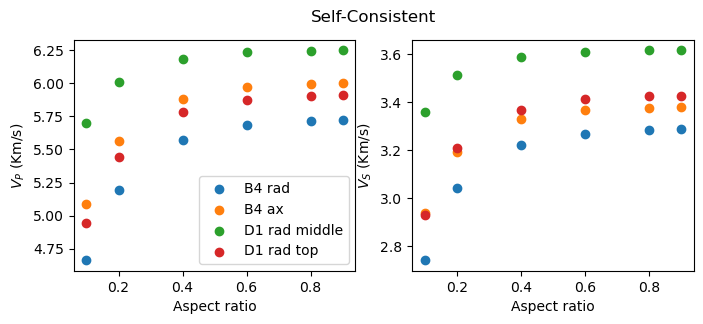

In [73]:
fig, ax = plt.subplots(1, 2, figsize = (8,3))
def plot_ar_vel(vp, vs, label, title):

    fig.suptitle(title)
    ax[0].scatter(alphas,vp, label = label)
    ax[0].set_xlabel('Aspect ratio')
    ax[0].set_ylabel('$V_P$ (Km/s)')
    ax[0].legend()
    ax[1].scatter(alphas,vs)
    ax[1].set_xlabel('Aspect ratio')
    ax[1].set_ylabel('$V_S$ (Km/s)')

plot_ar_vel([Vp2_1, Vp2_2, Vp2_3, Vp2_4, Vp2_5, Vp2_6],[Vs2_1, Vs2_2, Vs2_3, Vs2_4, Vs2_5, Vs2_6], 'B4 rad', 'Self-Consistent')

plot_ar_vel([Vp4_1, Vp4_2, Vp4_3, Vp4_4, Vp4_5, Vp4_6],[Vs4_1, Vs4_2, Vs4_3, Vs4_4, Vs4_5, Vs4_6], 'B4 ax', 'Self-Consistent')

plot_ar_vel([VpD1_5072_1, VpD1_5072_2, VpD1_5072_3, VpD1_5072_4, VpD1_5072_5, VpD1_5072_6],[VsD1_5072_1, VsD1_5072_2, VsD1_5072_3, VsD1_5072_4, VsD1_5072_5, VsD1_5072_6], 'D1 rad middle', 'Self-Consistent')

plot_ar_vel([VpD1_5072_topo_1, VpD1_5072_topo_2, VpD1_5072_topo_3, VpD1_5072_topo_4, VpD1_5072_topo_5, VpD1_5072_topo_6],[VsD1_5072_topo_1, VsD1_5072_topo_2, VsD1_5072_topo_3, VsD1_5072_topo_4, VsD1_5072_topo_5, VsD1_5072_topo_6], 'D1 rad top', 'Self-Consistent')

plt.savefig('ar_changing_sc.png', dpi=300, bbox_inches='tight')

### Calculated moduli from measured velocities

In [76]:
def real_moduli(vp, vs, rho):
    K = rho*((vp/1000)**2-(4/3)*(vs/1000)**2)
    G = rho*(vs/1000)**2
    return K, G

K_A3, G_A3 = real_moduli(4469.56,2557.21,2.42)
K_B4, G_B4 = real_moduli(4939.32,2646.27,2.73)

K_A3, G_A3, K_B4, G_B4
print(f'A3 -> K = {K_A3} G = {G_A3}')
print(f'B4 -> K = {K_B4} G = {G_B4}')

A3 -> K = 27.244043661149345 G = 15.825161621522
B4 -> K = 41.11349654739599 G = 19.117493612217


## Kuster Toksoz

In [77]:
import numpy as np

def KusterToksoz2(Km_list, Gm_list, Kf, Gf, alpha_list, x):
    K_results = []
    G_results = []

    for i in range(len(Km_list)):
        Km = Km_list[i]
        Gm = Gm_list[i]
        alpha = alpha_list[i]

        A = Gf / Gm - 1.0
        B = (Kf / Km - Gf / Gm) / 3.0
        R = Gm / (Km + (4.0 / 3.0) * Gm)
        Fm = (Gm / 6.0) * (9.0 * Km + 8.0 * Gm) / (Km + 2.0 * Gm)  # zeta

        if alpha == 1:
            alpha = 0.99
        if alpha < 1:
            theta = alpha * (np.arccos(alpha) - alpha * np.sqrt(1.0 - alpha * alpha)) / (1.0 - alpha * alpha) ** (3.0 / 2.0)
        if alpha > 1:
            theta = alpha * (alpha * (alpha**2 - 1)**(1./2.) - np.arccosh(alpha)) / (alpha**2 - 1)**(3./2.)

        f = alpha * alpha * (3.0 * theta - 2.0) / (1.0 - alpha * alpha)
        F1 = 1.0 + A * (1.5 * (f + theta) - R * (1.5 * f + 2.5 * theta - 4.0 / 3.0))
        F2 = 1.0 + A * (1.0 + 1.5 * (f + theta) - R * (1.5 * f + 2.5 * theta)) + B * (3.0 - 4.0 * R) + A * (A + 3.0 * B) * (
            1.5 - 2.0 * R) * (f + theta - R * (f - theta + 2.0 * theta * theta))
        F3 = 1.0 + A * (1.0 - f - 1.5 * theta + R * (f + theta))
        F4 = 1.0 + (A / 4.0) * (f + 3.0 * theta - R * (f - theta))
        F5 = A * (-f + R * (f + theta - 4.0 / 3.0)) + B * theta * (3.0 - 4.0 * R)
        F6 = 1.0 + A * (1.0 + f - R * (f + theta)) + B * (1.0 - theta) * (3.0 - 4.0 * R)
        F7 = 2.0 + (A / 4.0) * (3.0 * f + 9.0 * theta - R * (3.0 * f + 5.0 * theta)) + B * theta * (3.0 - 4.0 * R)
        F8 = A * (1.0 - 2.0 * R + (f / 2.0) * (R - 1.0) + (theta / 2.0) * (5.0 * R - 3.0)) + B * (1.0 - theta) * (
            3.0 - 4.0 * R)
        F9 = A * ((R - 1.0) * f - R * theta) + B * theta * (3.0 - 4.0 * R)
        T = 3.0 * F1 / F2
        P = T / 3
        Q = (2.0 / F3 + 1.0 / F4 + (F4 * F5 + F6 * F7 - F8 * F9) / (F2 * F4)) / 5

        sumk_total = 0
        sumg_total = 0
        zeta = (Gm * (9 * Km + 8 * Gm)) / (6 * (Km + 2.0 * Gm))

        for frac in x[1:]:  # Pulando a fração da matriz
            sumk_total += frac * (Kf - Km) * P
            sumg_total += frac * (Gf - Gm) * Q

        Gkt = (zeta * sumg_total + Gm * (Gm + zeta)) / (Gm + zeta - sumg_total)
        Kkt = (4.0 / 3.0 * Gm * sumk_total + Km * (Km + 4.0 / 3.0 * Gm)) / (Km + 4.0 / 3.0 * Gm - sumk_total)

        K_results.append(Kkt)
        G_results.append(Gkt)

    return K_results[0], G_results[0]

k = [37, 2.25]   # Bulk moduli of the constituents
mu = [44, 0.001]  # Shear moduli of the constituents
asp = [1., 1.]  # Aspect ratios of the inclusions
x = [0.9, .1]  # Volume fractions of the constituents
Kf = 2.25
Gf = 0

kbr, mubr = KusterToksoz2(k, mu, Kf, Gf, asp, x)
print("Effective Bulk Modulus: ", kbr)
print("Effective Shear Modulus: ", mubr)



Effective Bulk Modulus:  31.837136015183244
Effective Shear Modulus:  35.692008193626634


In [78]:
# K_kuster1, G_kuster1 = KusterToksoz2(K_sc1, G_sc1, alphas_sc1, volumes_sc1)
# Vp1 = np.sqrt((K_kuster1+(4/3)*G_kuster1)/(RHO_1))
# Vs1 = np.sqrt((G_kuster1)/(RHO_1))
# print(f'A3 Radial -> K = {K_kuster1} G = {G_kuster1}\n             Vp = {round(Vp1,3)} km/s Vs = {round(Vs1,3)}')  
print("Kuster Toksoz")
K_kuster2, G_kuster2 = KusterToksoz2(K_sc2, G_sc2, Kf, Gf,alphas_sc2, volumes_sc2)
Vp2_kuster = np.sqrt((K_kuster2+(4/3)*G_kuster2)/(RHO_2))
Vs2_kuster = np.sqrt((G_kuster2)/(RHO_2))
print(f'B4 Radial -> K = {K_kuster2} G = {G_kuster2}\n             Vp = {round(Vp2_kuster,3)} km/s Vs = {round(Vs2_kuster,3)}')  

K_kuster2_filt, G_kuster2_filt = KusterToksoz2(K_sc2_filt, G_sc2_filt, Kf, Gf,alphas_sc2_filt, volumes_sc2_filt)
Vp2_kuster_filt = np.sqrt((K_kuster2_filt+(4/3)*G_kuster2_filt)/(RHO_2))
Vs2_kuster_filt = np.sqrt((G_kuster2_filt)/(RHO_2))
print(f'B4 Radial filtered -> K = {K_kuster2_filt} G = {G_kuster2_filt}\n             Vp = {round(Vp2_kuster_filt,3)} km/s Vs = {round(Vs2_kuster_filt,3)}')  

# K_kuster3, G_kuster3 = KusterToksoz2(K_sc3, G_sc3, alphas_sc3, volumes_sc3)
# Vp3 = np.sqrt((K_kuster3+(4/3)*G_kuster3)/(RHO_3))
# Vs3 = np.sqrt((G_kuster3)/(RHO_3))
# print(f'A3 Axial -> K = {K_kuster3} G = {G_kuster3}\n             Vp = {round(Vp3,3)} km/s Vs = {round(Vs3,3)}')  

K_kuster4, G_kuster4 = KusterToksoz2(K_sc4, G_sc4, Kf, Gf,alphas_sc4, volumes_sc4)
Vp4 = np.sqrt((K_kuster4+(4/3)*G_kuster4)/(RHO_4))
Vs4 = np.sqrt((G_kuster4)/(RHO_4))
print(f'B4 Axial -> K = {K_kuster4} G = {G_kuster4}\n             Vp = {round(Vp4,3)} km/s Vs = {round(Vs4,3)}') 

K_kuster4_filt, G_kuster4_filt = KusterToksoz2(K_sc4_filt, G_sc4_filt, Kf, Gf,alphas_sc4_filt, volumes_sc4_filt)
Vp4_filt = np.sqrt((K_kuster4_filt+(4/3)*G_kuster4_filt)/(RHO_4))
Vs4_filt = np.sqrt((G_kuster4_filt)/(RHO_4))
print(f'B4 Axial filtered -> K = {K_kuster4_filt} G = {G_kuster4_filt}\n             Vp = {round(Vp4_filt,3)} km/s Vs = {round(Vs4_filt,3)}') 


K_kusterD1_5072, G_kusterD1_5072 = KusterToksoz2(K_scD1_5072, G_scD1_5072,Kf, Gf, alphas_scD1_5072, volumes_scD1_5072)
Vp4_D1_kuster = np.sqrt((K_kusterD1_5072+(4/3)*G_kusterD1_5072)/(RHO_D1_5072))
Vs4_D1_kuster = np.sqrt((G_kusterD1_5072)/(RHO_D1_5072))
print(f'D1 -> K = {K_kusterD1_5072} G = {G_kusterD1_5072}\n             Vp = {round(Vp4_D1_kuster,3)} km/s Vs = {round(Vs4_D1_kuster,3)}')  

K_kusterD1_5072_filt, G_kusterD1_5072_filt = KusterToksoz2(K_scD1_5072_filt, G_scD1_5072_filt,Kf, Gf, alphas_scD1_5072_filt, volumes_scD1_5072_filt)
Vp4_D1_kuster_filt = np.sqrt((K_kusterD1_5072_filt+(4/3)*G_kusterD1_5072_filt)/(RHO_D1_5072))
Vs4_D1_kuster_filt = np.sqrt((G_kusterD1_5072_filt)/(RHO_D1_5072))
print(f'D1 filtered -> K = {K_kusterD1_5072_filt} G = {G_kusterD1_5072_filt}\n             Vp = {round(Vp4_D1_kuster_filt,3)} km/s Vs = {round(Vs4_D1_kuster_filt,3)}')  

K_kusterD1_5072_topo, G_kusterD1_5072_topo = KusterToksoz2(K_scD1_5072_topo, G_scD1_5072_topo,Kf, Gf, alphas_scD1_5072_topo, volumes_scD1_5072_topo)
Vp4_D1_kuster_topo = np.sqrt((K_kusterD1_5072_topo+(4/3)*G_kusterD1_5072_topo)/(RHO_D1_5072_topo))
Vs4_D1_kuster_topo = np.sqrt((G_kusterD1_5072_topo)/(RHO_D1_5072_topo))
print(f'D1 topo -> K = {K_kusterD1_5072_topo} G = {G_kusterD1_5072_topo}\n             Vp = {round(Vp4_D1_kuster_topo,3)} km/s Vs = {round(Vs4_D1_kuster_topo,3)}')  

K_kusterD1_5072_topo_filt, G_kusterD1_5072_topo_filt = KusterToksoz2(K_scD1_5072_topo_filt, G_scD1_5072_topo_filt,Kf, Gf, alphas_scD1_5072_topo_filt, volumes_scD1_5072_topo_filt)
Vp4_D1_kuster_topo_filt = np.sqrt((K_kusterD1_5072_topo_filt+(4/3)*G_kusterD1_5072_topo_filt)/(RHO_D1_5072_topo))
Vs4_D1_kuster_topo_filt = np.sqrt((G_kusterD1_5072_topo_filt)/(RHO_D1_5072_topo))
print(f'D1 topo filtered-> K = {K_kusterD1_5072_topo_filt} G = {G_kusterD1_5072_topo_filt}\n             Vp = {round(Vp4_D1_kuster_topo_filt,3)} km/s Vs = {round(Vs4_D1_kuster_topo_filt,3)}')  
# # RHO_D1_5072 = (RHO_CALCITE*v_calc_5072 + RHO_DOLOMITE*v_dol_5072 + RHO_QUARTZ*v_quartz_5072)*(1-PHI_IMAGE_D15072)
# K_berryD1_5072, G_berryD1_5072 = berryscm(K_scD1_5072, G_scD1_5072, alphas_scD1_5072, volumes_scD1_5072)
# VpD1_5072 = np.sqrt((K_berryD1_5072+(4/3)*G_berryD1_5072)/(RHO_D1_5072))
# VsD1_5072 = np.sqrt((G_berryD1_5072)/(RHO_D1_5072))
# print(f'D1 5072 -> K = {K_berryD1_5072} G = {G_berryD1_5072}\n             Vp = {round(VpD1_5072,3)} km/s Vs = {round(VsD1_5072,3)}')  

Kuster Toksoz
B4 Radial -> K = 47.988193728276116 G = 28.128171730129832
             Vp = 5.872 km/s Vs = 3.368
B4 Radial filtered -> K = 53.686297979131254 G = 31.29177581612645
             Vp = 6.203 km/s Vs = 3.553
B4 Axial -> K = 51.68132881236804 G = 30.18640947493301
             Vp = 5.978 km/s Vs = 3.426
B4 Axial filtered -> K = 58.730224550200774 G = 34.035868192610636
             Vp = 6.362 km/s Vs = 3.637
D1 -> K = 57.63893485996789 G = 34.851423753322905
             Vp = 6.274 km/s Vs = 3.63
D1 filtered -> K = 61.09702800129196 G = 36.838510473295514
             Vp = 6.456 km/s Vs = 3.732
D1 topo -> K = 50.31153754044022 G = 30.572925039595148
             Vp = 6.018 km/s Vs = 3.487
D1 topo filtered-> K = 55.156521330423104 G = 33.41237743997177
             Vp = 6.297 km/s Vs = 3.645


In [79]:
# B4 radial

K_kuster2_1, G_kuster2_1 = KusterToksoz2(K_sc2, G_sc2,Kf, Gf, df_B4_rad.alphas1, volumes_sc2)
K_kuster2_2, G_kuster2_2 = KusterToksoz2(K_sc2, G_sc2,Kf, Gf, df_B4_rad.alphas2, volumes_sc2)
K_kuster2_3, G_kuster2_3 = KusterToksoz2(K_sc2, G_sc2,Kf, Gf, df_B4_rad.alphas3, volumes_sc2)
K_kuster2_4, G_kuster2_4 = KusterToksoz2(K_sc2, G_sc2,Kf, Gf, df_B4_rad.alphas4, volumes_sc2)
K_kuster2_5, G_kuster2_5 = KusterToksoz2(K_sc2, G_sc2,Kf, Gf, df_B4_rad.alphas5, volumes_sc2)
K_kuster2_6, G_kuster2_6 = KusterToksoz2(K_sc2, G_sc2,Kf, Gf, df_B4_rad.alphas6, volumes_sc2)
Vp2_1_kt = np.sqrt((K_kuster2_1+(4/3)*G_kuster2_1)/(RHO_2))
Vs2_1_kt = np.sqrt((G_kuster2_1)/(RHO_2))

Vp2_2_kt = np.sqrt((K_kuster2_2+(4/3)*G_kuster2_2)/(RHO_2))
Vs2_2_kt = np.sqrt((G_kuster2_2)/(RHO_2))

Vp2_3_kt = np.sqrt((K_kuster2_3+(4/3)*G_kuster2_3)/(RHO_2))
Vs2_3_kt = np.sqrt((G_kuster2_3)/(RHO_2))

Vp2_4_kt = np.sqrt((K_kuster2_4+(4/3)*G_kuster2_4)/(RHO_2))
Vs2_4_kt = np.sqrt((G_kuster2_4)/(RHO_2))

Vp2_5_kt = np.sqrt((K_kuster2_5+(4/3)*G_kuster2_5)/(RHO_2))
Vs2_5_kt = np.sqrt((G_kuster2_5)/(RHO_2))

Vp2_6_kt = np.sqrt((K_kuster2_6+(4/3)*G_kuster2_6)/(RHO_2))
Vs2_6_kt = np.sqrt((G_kuster2_6)/(RHO_2))
# print(f'B4 Radial -> K = {K_berry2_1} G = {G_berry2_1}\n Vp = {round(Vp2_1,3)} km/s Vs = {round(Vs2_1,3)}')  

# B4 axial
K_kuster4_1, G_kuster4_1 = KusterToksoz2(K_sc4, G_sc4,Kf, Gf, df_B4_ax.alphas1, volumes_sc4)
K_kuster4_2, G_kuster4_2 = KusterToksoz2(K_sc4, G_sc4,Kf, Gf, df_B4_ax.alphas2, volumes_sc4)
K_kuster4_3, G_kuster4_3 = KusterToksoz2(K_sc4, G_sc4,Kf, Gf, df_B4_ax.alphas3, volumes_sc4)
K_kuster4_4, G_kuster4_4 = KusterToksoz2(K_sc4, G_sc4,Kf, Gf, df_B4_ax.alphas4, volumes_sc4)
K_kuster4_5, G_kuster4_5 = KusterToksoz2(K_sc4, G_sc4,Kf, Gf, df_B4_ax.alphas5, volumes_sc4)
K_kuster4_6, G_kuster4_6 = KusterToksoz2(K_sc4, G_sc4,Kf, Gf, df_B4_ax.alphas6, volumes_sc4)
Vp4_1_kt = np.sqrt((K_kuster4_1+(4/3)*G_kuster4_1)/(RHO_2))
Vs4_1_kt = np.sqrt((G_kuster4_1)/(RHO_4))

Vp4_2_kt = np.sqrt((K_kuster4_2+(4/3)*G_kuster4_2)/(RHO_2))
Vs4_2_kt = np.sqrt((G_kuster4_2)/(RHO_4))

Vp4_3_kt = np.sqrt((K_kuster4_3+(4/3)*G_kuster4_3)/(RHO_2))
Vs4_3_kt = np.sqrt((G_kuster4_3)/(RHO_4))

Vp4_4_kt = np.sqrt((K_kuster4_4+(4/3)*G_kuster4_4)/(RHO_2))
Vs4_4_kt = np.sqrt((G_kuster4_4)/(RHO_4))

Vp4_5_kt = np.sqrt((K_kuster4_5+(4/3)*G_kuster4_5)/(RHO_2))
Vs4_5_kt = np.sqrt((G_kuster4_5)/(RHO_4))

Vp4_6_kt = np.sqrt((K_kuster4_6+(4/3)*G_kuster4_6)/(RHO_2))
Vs4_6_kt = np.sqrt((G_kuster4_6)/(RHO_4))
# print(f'B4 Radial -> K = {K_berry2_1} G = {G_berry2_1}\n Vp = {round(Vp2_1,3)} km/s Vs = {round(Vs2_1,3)}')  


# D1 meio
RHO_D1_5072 = (RHO_CALCITE*v_calc_5072 + RHO_DOLOMITE*v_dol_5072 + RHO_QUARTZ*v_quartz_5072)*(1-PHI_IMAGE_D15072) + PHI_IMAGE_D15072*RHO_FLUID
K_kusterD1_5072_1, G_kusterD1_5072_1 = KusterToksoz2(K_scD1_5072, G_scD1_5072,Kf, Gf, df_D1_1.alphas1, volumes_scD1_5072)
K_kusterD1_5072_2, G_kusterD1_5072_2 = KusterToksoz2(K_scD1_5072, G_scD1_5072,Kf, Gf, df_D1_1.alphas2, volumes_scD1_5072)
K_kusterD1_5072_3, G_kusterD1_5072_3 = KusterToksoz2(K_scD1_5072, G_scD1_5072,Kf, Gf, df_D1_1.alphas3, volumes_scD1_5072)
K_kusterD1_5072_4, G_kusterD1_5072_4 = KusterToksoz2(K_scD1_5072, G_scD1_5072,Kf, Gf, df_D1_1.alphas4, volumes_scD1_5072)
K_kusterD1_5072_5, G_kusterD1_5072_5 = KusterToksoz2(K_scD1_5072, G_scD1_5072,Kf, Gf, df_D1_1.alphas5, volumes_scD1_5072)
K_kusterD1_5072_6, G_kusterD1_5072_6 = KusterToksoz2(K_scD1_5072, G_scD1_5072,Kf, Gf, df_D1_1.alphas6, volumes_scD1_5072)

VpD1_5072_1_kt = np.sqrt((K_kusterD1_5072_1+(4/3)*G_kusterD1_5072_1)/(RHO_D1_5072))
VsD1_5072_1_kt = np.sqrt((G_kusterD1_5072_1)/(RHO_D1_5072))

VpD1_5072_2_kt = np.sqrt((K_kusterD1_5072_2+(4/3)*G_kusterD1_5072_2)/(RHO_D1_5072))
VsD1_5072_2_kt = np.sqrt((G_kusterD1_5072_2)/(RHO_D1_5072))

VpD1_5072_3_kt = np.sqrt((K_kusterD1_5072_3+(4/3)*G_kusterD1_5072_3)/(RHO_D1_5072))
VsD1_5072_3_kt = np.sqrt((G_kusterD1_5072_3)/(RHO_D1_5072))

VpD1_5072_4_kt = np.sqrt((K_kusterD1_5072_4+(4/3)*G_kusterD1_5072_4)/(RHO_D1_5072))
VsD1_5072_4_kt = np.sqrt((G_kusterD1_5072_4)/(RHO_D1_5072))

VpD1_5072_5_kt = np.sqrt((K_kusterD1_5072_5+(4/3)*G_kusterD1_5072_5)/(RHO_D1_5072))
VsD1_5072_5_kt = np.sqrt((G_kusterD1_5072_5)/(RHO_D1_5072))

VpD1_5072_6_kt = np.sqrt((K_kusterD1_5072_6+(4/3)*G_kusterD1_5072_6)/(RHO_D1_5072))
VsD1_5072_6_kt = np.sqrt((G_kusterD1_5072_6)/(RHO_D1_5072))

# D1 topo

RHO_D1_5072_topo = (RHO_CALCITE*v_calc_5072 + RHO_DOLOMITE*v_dol_5072 + RHO_QUARTZ*v_quartz_5072)*(1-PHI_IMAGE_D15072_topo) + PHI_IMAGE_D15072_topo*RHO_FLUID
K_kusterD1_5072_topo_1, G_kusterD1_5072_topo_1 = KusterToksoz2(K_scD1_5072_topo, G_scD1_5072_topo,Kf, Gf, df_D1_2.alphas1, volumes_scD1_5072_topo)
K_kusterD1_5072_topo_2, G_kusterD1_5072_topo_2 = KusterToksoz2(K_scD1_5072_topo, G_scD1_5072_topo,Kf, Gf, df_D1_2.alphas2, volumes_scD1_5072_topo)
K_kusterD1_5072_topo_3, G_kusterD1_5072_topo_3 = KusterToksoz2(K_scD1_5072_topo, G_scD1_5072_topo,Kf, Gf, df_D1_2.alphas3, volumes_scD1_5072_topo)
K_kusterD1_5072_topo_4, G_kusterD1_5072_topo_4 = KusterToksoz2(K_scD1_5072_topo, G_scD1_5072_topo,Kf, Gf, df_D1_2.alphas4, volumes_scD1_5072_topo)
K_kusterD1_5072_topo_5, G_kusterD1_5072_topo_5 = KusterToksoz2(K_scD1_5072_topo, G_scD1_5072_topo,Kf, Gf, df_D1_2.alphas5, volumes_scD1_5072_topo)
K_kusterD1_5072_topo_6, G_kusterD1_5072_topo_6 = KusterToksoz2(K_scD1_5072_topo, G_scD1_5072_topo,Kf, Gf, df_D1_2.alphas6, volumes_scD1_5072_topo)
VpD1_5072_topo_1_kt = np.sqrt((K_kusterD1_5072_topo_1+(4/3)*G_kusterD1_5072_topo_1)/(RHO_D1_5072_topo))
VsD1_5072_topo_1_kt = np.sqrt((G_kusterD1_5072_topo_1)/(RHO_D1_5072_topo))

VpD1_5072_topo_2_kt = np.sqrt((K_kusterD1_5072_topo_2+(4/3)*G_kusterD1_5072_topo_2)/(RHO_D1_5072_topo))
VsD1_5072_topo_2_kt = np.sqrt((G_kusterD1_5072_topo_2)/(RHO_D1_5072_topo))

VpD1_5072_topo_3_kt = np.sqrt((K_kusterD1_5072_topo_3+(4/3)*G_kusterD1_5072_topo_3)/(RHO_D1_5072_topo))
VsD1_5072_topo_3_kt = np.sqrt((G_kusterD1_5072_topo_3)/(RHO_D1_5072_topo))

VpD1_5072_topo_4_kt = np.sqrt((K_kusterD1_5072_topo_4+(4/3)*G_kusterD1_5072_topo_4)/(RHO_D1_5072_topo))
VsD1_5072_topo_4_kt = np.sqrt((G_kusterD1_5072_topo_4)/(RHO_D1_5072_topo))

VpD1_5072_topo_5_kt = np.sqrt((K_kusterD1_5072_topo_5+(4/3)*G_kusterD1_5072_topo_5)/(RHO_D1_5072_topo))
VsD1_5072_topo_5_kt = np.sqrt((G_kusterD1_5072_topo_5)/(RHO_D1_5072_topo))

VpD1_5072_topo_6_kt = np.sqrt((K_kusterD1_5072_topo_6+(4/3)*G_kusterD1_5072_topo_6)/(RHO_D1_5072_topo))
VsD1_5072_topo_6_kt = np.sqrt((G_kusterD1_5072_topo_6)/(RHO_D1_5072_topo))

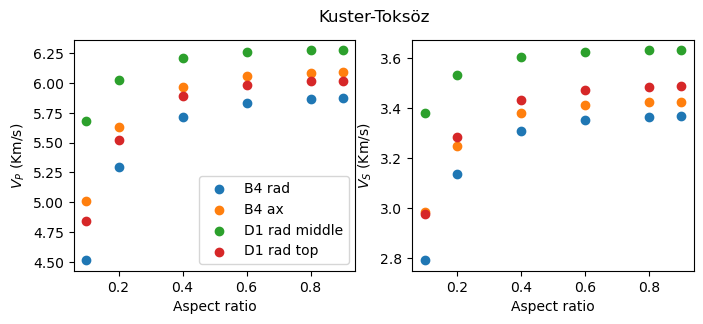

In [80]:
fig, ax = plt.subplots(1, 2, figsize = (8,3))
plot_ar_vel([Vp2_1_kt, Vp2_2_kt, Vp2_3_kt, Vp2_4_kt, Vp2_5_kt, Vp2_6_kt],[Vs2_1_kt, Vs2_2_kt, Vs2_3_kt, Vs2_4_kt, Vs2_5_kt, Vs2_6_kt], 'B4 rad', 'Kuster-Toksöz')

plot_ar_vel([Vp4_1_kt, Vp4_2_kt, Vp4_3_kt, Vp4_4_kt, Vp4_5_kt, Vp4_6_kt],[Vs4_1_kt, Vs4_2_kt, Vs4_3_kt, Vs4_4_kt, Vs4_5_kt, Vs4_6_kt], 'B4 ax', 'Kuster-Toksöz')

plot_ar_vel([VpD1_5072_1_kt, VpD1_5072_2_kt, VpD1_5072_3_kt, VpD1_5072_4_kt, VpD1_5072_5_kt, VpD1_5072_6_kt],[VsD1_5072_1_kt, VsD1_5072_2_kt, VsD1_5072_3_kt, VsD1_5072_4_kt, VsD1_5072_5_kt, VsD1_5072_6_kt], 'D1 rad middle', 'Kuster-Toksöz')

plot_ar_vel([VpD1_5072_topo_1_kt, VpD1_5072_topo_2_kt, VpD1_5072_topo_3_kt, VpD1_5072_topo_4_kt, VpD1_5072_topo_5_kt, VpD1_5072_topo_6_kt],[VsD1_5072_topo_1_kt, VsD1_5072_topo_2_kt, VsD1_5072_topo_3_kt, VsD1_5072_topo_4_kt, VsD1_5072_topo_5_kt, VsD1_5072_topo_6_kt], 'D1 rad top', 'Kuster-Toksöz')

plt.savefig('ar_changing_kt.png', dpi=300, bbox_inches='tight')

Real velocities

A3 -> VP: 4939,329051  VS: 2646,271511

B4 -> VP: 4469,565217  VS: 2557,21393